# ---- SETUP CELLS (RUN FIRST) ----

In [2]:
# Welcome to the Python Latency Organizer.

# Run this cell first to setup imports and move to the correct directory.

import sys
import os

# Get the current directory, __file__ does not work in .ipynb so i had to look up how to get the directory of the file online for ipynb.
here = os.getcwd()  # = cd to current directory

# get to src/ folder
src_path = os.path.join(here, "..", "src")  # cd .. then cd src
sys.path.append(src_path) #let python search for modules inside of src folder.

# now we can import modules we made easier. 
from latency.latency_tester import LatencyTester
from utils.io_utils import append_session_row
from analysis.data_analyzer import DataAnalyzer
from analysis.plots import Plots
from utils.helpers import prompt_and_validate

# ----- HELPER + SEED CELLS -----

In [3]:
# SEED CELL
# Run this cell if you want to automatically run some test sessions and seed the results file with those session summaries.

seed_urls = [
    "https://google.com",
    "https://youtube.com",
    "https://stevens.edu",
    "https://wikipedia.org",
    "https://github.com",
]

label = "Seed Test"
attempts = 3 

for url in seed_urls:
    print(f"\nRunning seed test for: {url}")

    tester = LatencyTester(url, attempts=attempts, timeout=5, label=label)
    tester.run_tests()

    session = tester.create_session_row()

    print("Seed session in progress..") 

    append_session_row(session)


Running seed test for: https://google.com
Seed session in progress..

Session summary properly appended to the results file

Running seed test for: https://youtube.com
Seed session in progress..

Session summary properly appended to the results file

Running seed test for: https://stevens.edu
Seed session in progress..

Session summary properly appended to the results file

Running seed test for: https://wikipedia.org
Seed session in progress..

Session summary properly appended to the results file

Running seed test for: https://github.com
Seed session in progress..

Session summary properly appended to the results file


In [ ]:
# CLEAR RESULTS CELL
# Run this cell if you want to fully clear the results CSV
from utils.io_utils import delete_results_csv

delete_results_csv()

In [ ]:
# CLEAR ALL OF A LABEL FROM RESULTS
label = prompt_and_validate("Enter a label to remove all rows with that label from your results file: ", "String")
## todo: william

In [ ]:
# CLEAR ALL OF A URL FROM RESULTS
url = prompt_and_validate("Enter a URL to remove all rows with that URL from your results file: ", "URL")
## todo: william

# ----- LATENCY TEST A URL -----

In [ ]:
# Run this cell to do a test session for a URL and append it to the results file.
print("URL Format: (https://***.xyz)\nLabel: Used to differentiate between WIFI, Wired, School\nAttempts: How many times to test connection in session.\n")

# Get safe user inputs
url = prompt_and_validate("Enter a URL to test: ", "URL")
label = prompt_and_validate("Enter a label for this run: ", "String")
attempts = prompt_and_validate("Enter how many times to test this URL: ", "Integer")


tester = LatencyTester(url=url, attempts=attempts, timeout=5, label=label)
tester.run_tests()

session = tester.create_session_row()

print(tester)

append_session_row(session)

# ----- ANALYSIS CELLS -----

Data from ../results/results.csv

Overall Stats:
total_attempts                81.000000
total_successes               81.000000
total_failures                 0.000000
overall_success_rate         100.000000
overall_avg_latency_ms       278.222963
overall_stddev_latency_ms     97.326309
min_latency_ms               124.790000
max_latency_ms               649.840000

Per-URL Stats:
                       attempts_total  successes_total  failures_total  success_rate  failure_rate  min_latency_ms  max_latency_ms  avg_latency_ms  stddev_latency_ms  latency_range_ms  \
url                                                                                                                                                                                       
https://amazon.com                  3                3               0         100.0           0.0          196.21          255.54      222.220000                NaN             59.33   
https://github.com                 15               15

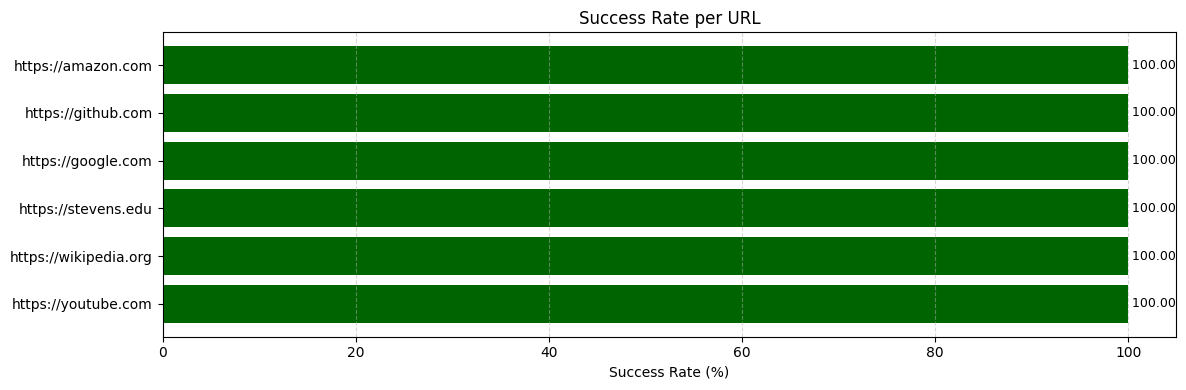

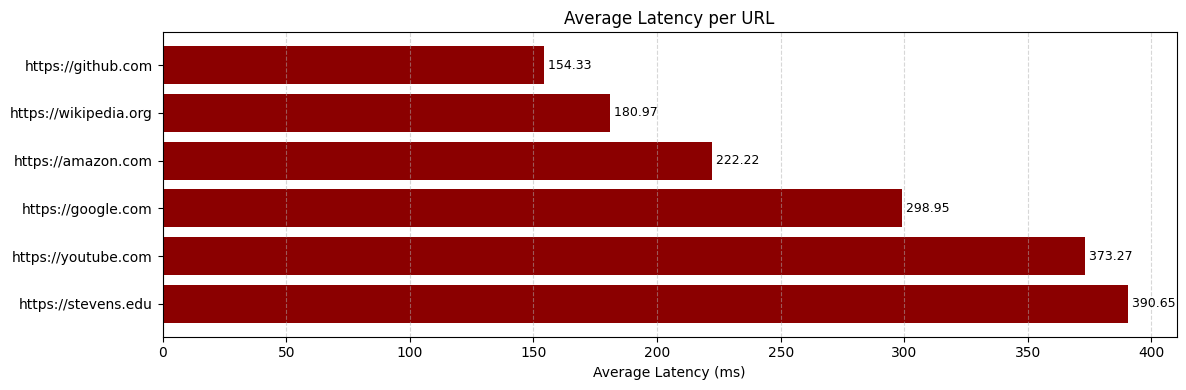

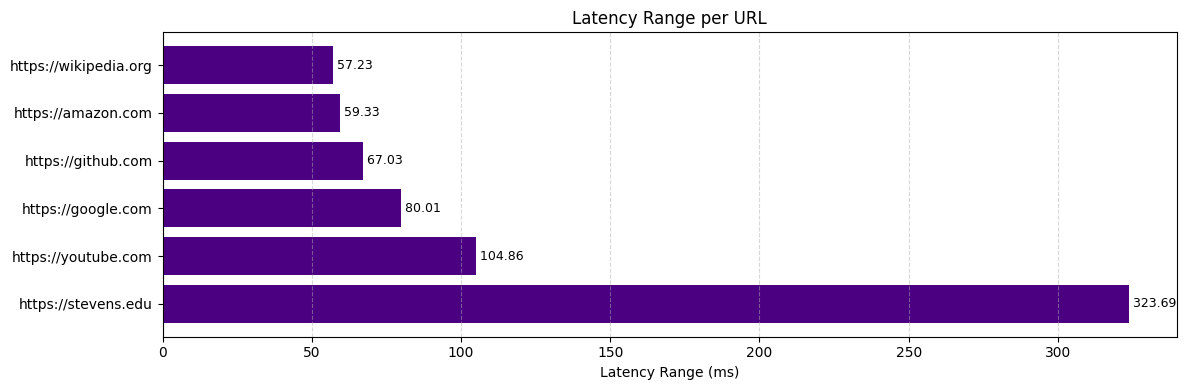

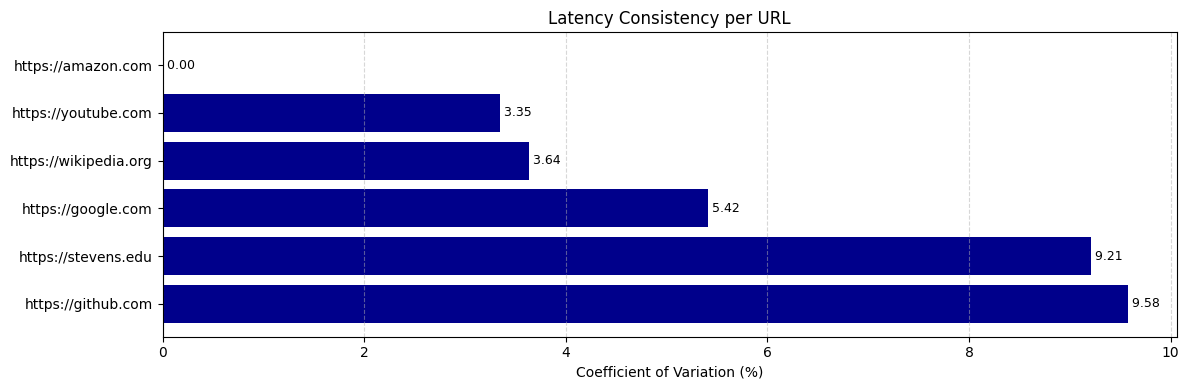

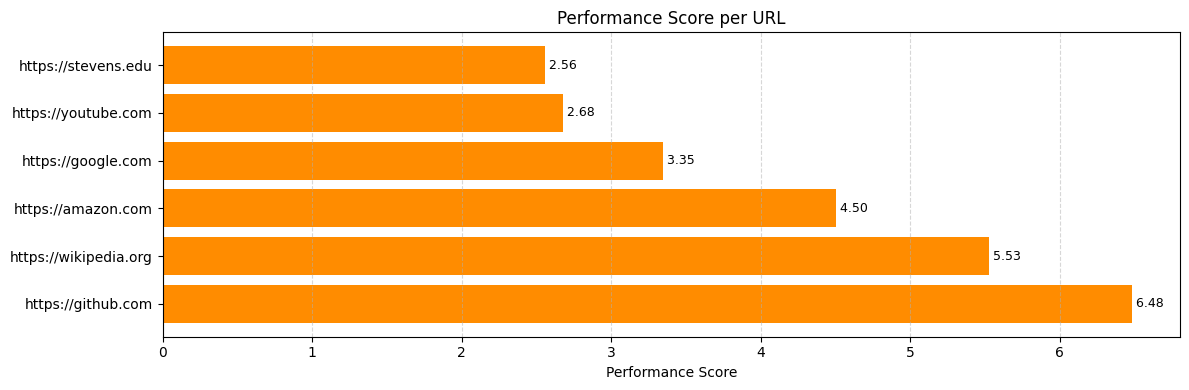

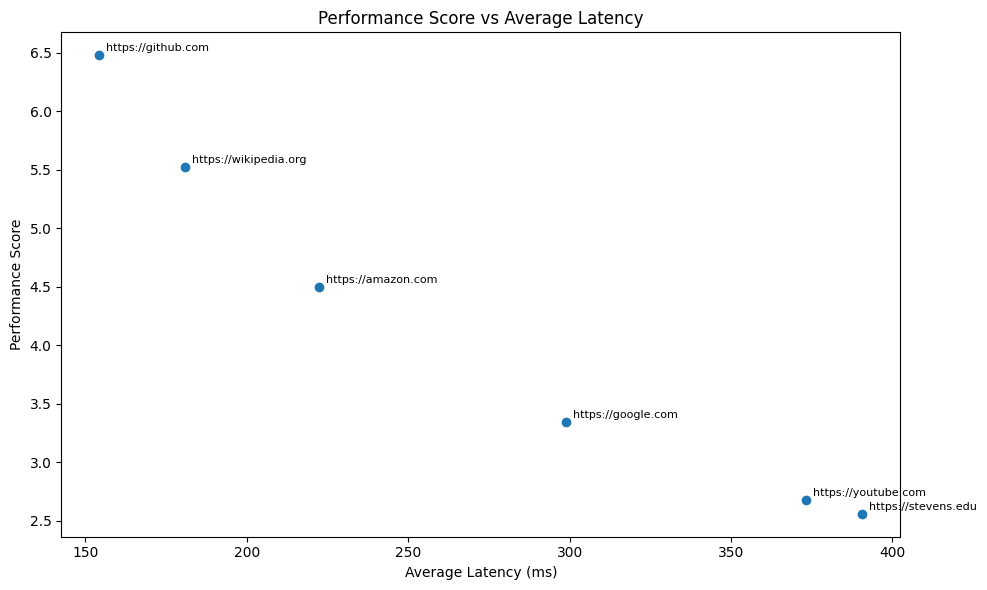

In [4]:
## add a bunch of analysis cells using pandas and matplotlib

# write programs in src/analysis for helpers, then call in here and below cells for stats

# todo: Johnathan 

# Run this first to calculate all stats of entire CSV
# We can then use analyzer to perform other types of analysis
analyzer = DataAnalyzer("../results/results.csv")
print(analyzer)

url_plots = Plots(analyzer)

url_plots.plot_success_rate()
url_plots.plot_avg_latency()
url_plots.plot_latency_range()
url_plots.plot_cv_latency()
url_plots.plot_performance_score()
url_plots.plot_performance_vs_latency()



In [ ]:
# Analyze a Label
# Input what label you want to analyze

print("Input a label to analyze\ne.g. WIFI")

label = prompt_and_validate("Enter a label to analyze: ", "String")

label_data = analyzer.filter_by_value("label", label)

label_analyzer = DataAnalyzer(dataframe=label_data)

label_plots = Plots(label_analyzer)
label_plots.plot_success_rate()
label_plots.plot_avg_latency()
label_plots.plot_latency_range()
label_plots.plot_cv_latency()
label_plots.plot_performance_score()

Input a URL to analyze
e.g. https://youtube.com


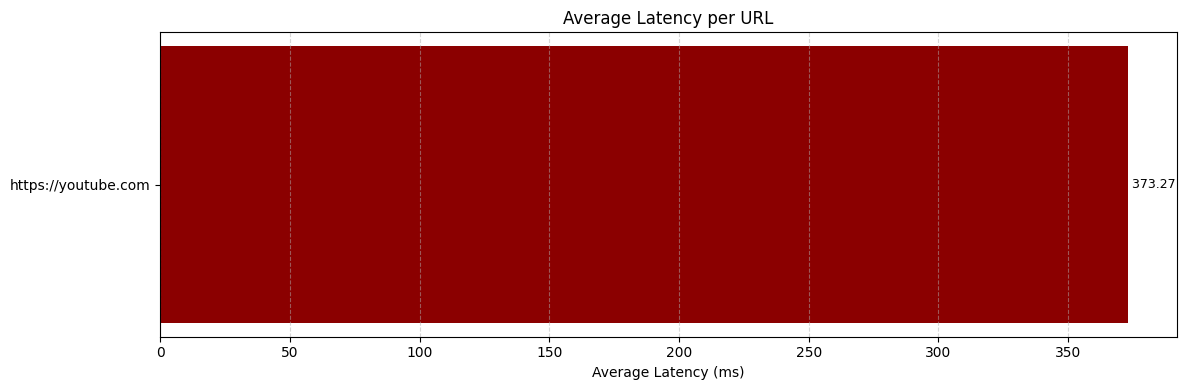

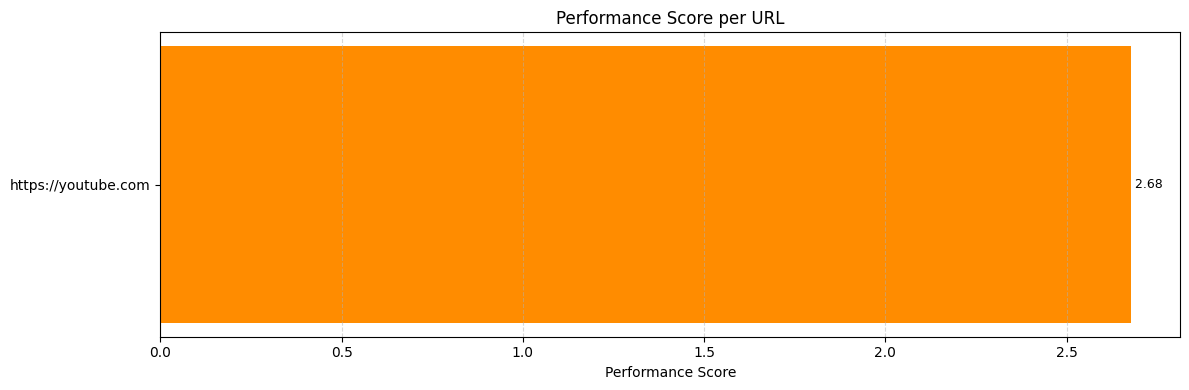

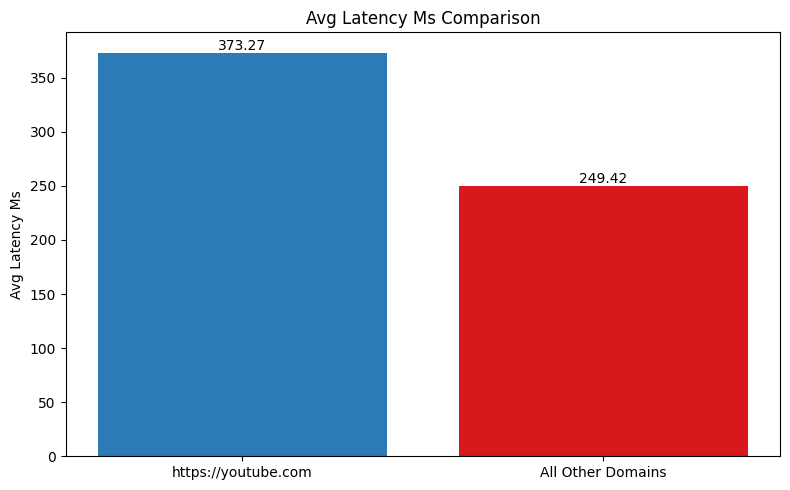

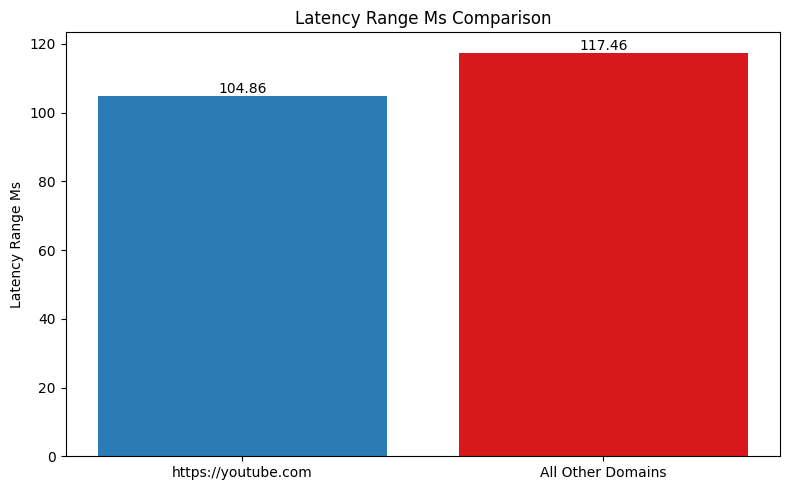

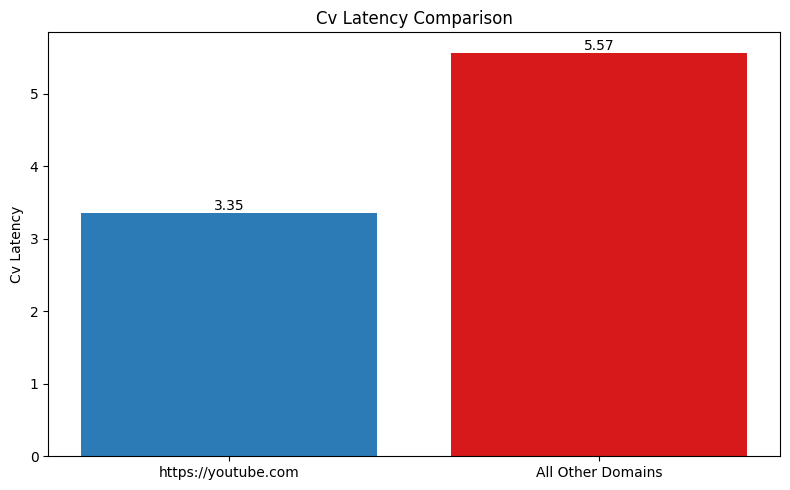

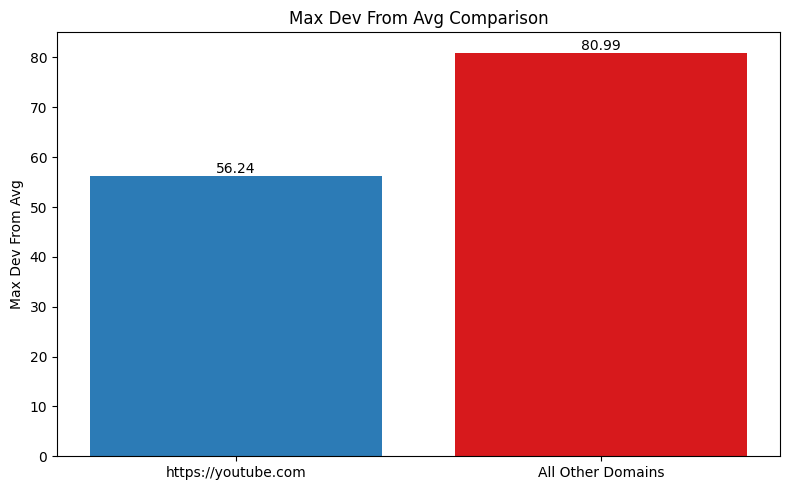

In [5]:
# Analyze a URL
# Input what url you want to analyze

print("Input a URL to analyze\ne.g. https://youtube.com")

domain = prompt_and_validate("Enter domain/url: ", "URL")
site_data = analyzer.filter_by_value("url", domain)

site_analyzer = DataAnalyzer(dataframe=site_data)

# URL specific metrics
site_plots = Plots(site_analyzer)
site_plots.plot_avg_latency()
site_plots.plot_performance_score()

# Compare this URL to all other domains
plots = Plots(analyzer)
plots.plot_domain_vs_others(domain, "avg_latency_ms")
plots.plot_domain_vs_others(domain, "latency_range_ms")
plots.plot_domain_vs_others(domain, "cv_latency")
plots.plot_domain_vs_others(domain, "max_dev_from_avg")
